#  Trabalho prático 2  

O trabalho prático que se segue, destina-se à previsão se uma feature consoante os outros dados presente no csv. 

Numa primeira instância são importadas as librarias. 


In [60]:
import pandas as pd
import numpy as np  
from fancyimpute import KNN 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns 
import csv 
import statistics  
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline

De seguida, é necessário importar os dados de teste de modo a avaliar o modelo numa primeira instância.

In [105]:
data = pd.read_csv("train_data.csv")

In [106]:
count_1, count_0 = target.value_counts() 
print(count_1) 
print(count_0) 

df_class1 = data[data['Absent'] == 1] 
df_class0 = data[data['Absent'] == 0]

395
105


In [107]:
df_class1_under = df_class1.sample(count_0) 
df_test_under = pd.concat([df_class1_under,df_class0],axis=0) 

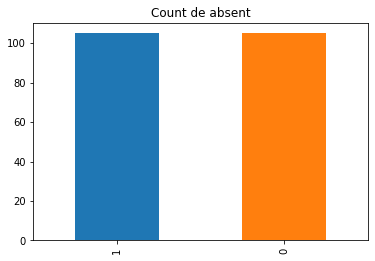

In [108]:
df_test_under['Absent'].value_counts().plot(kind='bar',title='Count de absent')

In [110]:
target = df_test_under['Absent']

In [111]:
train = df_test_under.drop('Absent',axis=1)

# Limpeza dos dados

In [64]:
# Remove ID uma vez que este não será usado nas previsões
train = train.drop(["ID"],axis=1)

In [65]:
train['Work load Average/day '] = train['Work load Average/day '].str.replace(",",".")

In [66]:
train['Work load Average/day ']

0      239.554
1      239.554
2      239.554
3      239.554
4      239.554
5      239.554
6      239.554
7      239.554
8      239.554
9      239.554
10     239.554
11     239.554
12     239.554
13     239.554
14     239.554
15     239.554
16     239.554
17     239.554
18     239.554
19     205.917
20     205.917
21     205.917
22     205.917
23     205.917
24     205.917
25     205.917
26     205.917
27     205.917
28     205.917
29     205.917
        ...   
470    230.290
471    230.290
472    230.290
473    230.290
474    230.290
475    230.290
476    230.290
477    230.290
478    230.290
479    230.290
480    249.797
481    249.797
482    249.797
483    249.797
484    249.797
485    249.797
486    249.797
487    249.797
488    249.797
489    249.797
490    249.797
491    249.797
492    249.797
493    249.797
494    249.797
495    261.756
496    261.756
497    261.756
498    261.756
499    261.756
Name: Work load Average/day , Length: 500, dtype: object

In [67]:
train['Work load Average/day '] = pd.to_numeric(train['Work load Average/day '])

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null float64
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                                500 non-null int64
Weight                       

Separar as features em categorias e númerico

In [69]:
categorical = ["Reason for absence","Month of absence","Day of the week",
               "Seasons","Disciplinary failure","Education","Social drinker","Social smoker"] 

numerical = ["Transportation expense","Distance from Residence to Work","Service time",
             "Age","Work load Average/day ","Hit target",
             "Son","Pet","Weight","Height","Body mass index"]

In [70]:
# Converter os categóricos para a categoria "category" 
for i in categorical :
    train[i] = train[i].astype("category")

In [71]:
# Substituir os zeros de algumas features por Non Available (NA) 
for i in ["Reason for absence","Month of absence","Day of the week","Seasons",
          "Education","Age","Weight","Height","Body mass index"]:
          train[i] = train[i].replace(0,np.nan)

In [72]:
# fazemos um count dos valores NA
NA_data = pd.DataFrame(train.isnull().sum())
NA_data = NA_data.rename(columns={0:"Soma_NA"})
NA_data["Percentagem_NA"] = (NA_data["Soma_NA"]/len(train))*100
NA_data

,Soma_NA,Percentagem_NA
Reason for absence,32,6.4
Month of absence,0,0.0
Day of the week,0,0.0
Seasons,0,0.0
Transportation expense,0,0.0
Distance from Residence to Work,0,0.0
Service time,0,0.0
Age,0,0.0
Work load Average/day,0,0.0
Hit target,0,0.0


Ora, como é possível observar a Reason for Absence possui cerca de 32 entradas com valor 0, pelo que após de analisar os códigos no CID 9, é impossível ter um código de doença igual a zero.

In [73]:
pd.DataFrame(train[train['Reason for absence'].isna()])

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
1,NaN,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
50,NaN,9,2,4,260,50,11,36,241.476,92,1,1,4,1,0,0,65,168,23
51,NaN,9,2,4,225,26,9,28,241.476,92,1,1,1,0,0,2,69,169,24
54,NaN,9,3,4,289,36,13,33,241.476,92,1,1,2,1,0,1,90,172,30
55,NaN,9,3,4,118,13,18,50,241.476,92,1,1,1,1,0,0,98,178,31
58,NaN,9,4,4,369,17,12,31,241.476,92,1,1,3,1,0,0,70,169,25
64,NaN,10,4,4,118,13,18,50,253.465,93,1,1,1,1,0,0,98,178,31
203,NaN,4,2,3,235,29,12,48,326.452,96,1,1,1,0,1,5,88,163,33
213,NaN,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24
214,NaN,5,4,3,330,16,4,28,378.884,92,1,2,0,0,0,0,84,182,25


### Preenchimento dos NAs 

In [80]:
#### Missing value analysis
## Mean mode method method 
## Mean for numerical features
##Mode for categorical features
def impute_mean_mode(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = round(data_set[i].fillna(data_set[i].mean()))

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
             if i != 'Reason for absence':
                data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
            
    return data_set

In [81]:
## median method for numerical features
##Mode for categorical features
def impute_median_mode(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = data_set[i].fillna(data_set[i].median())

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category': 
            if i != 'Reason for absence':
                data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
            
            
    return data_set

### Análise de outliers

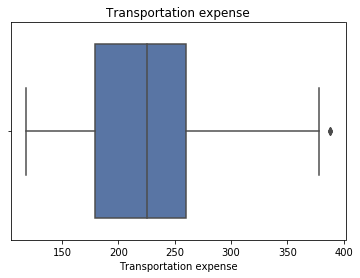

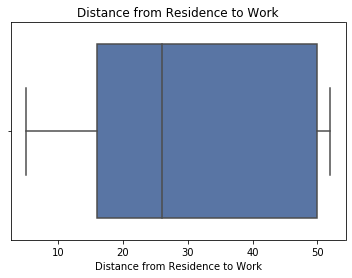

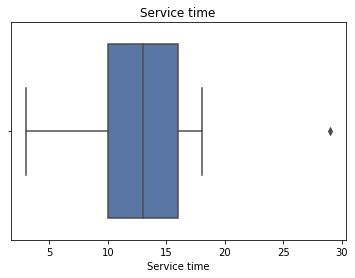

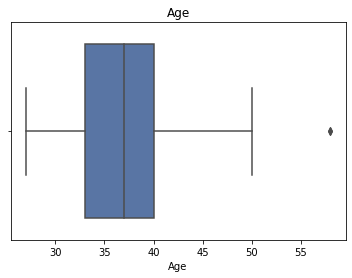

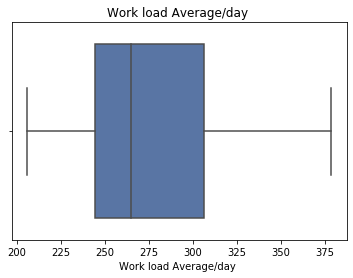

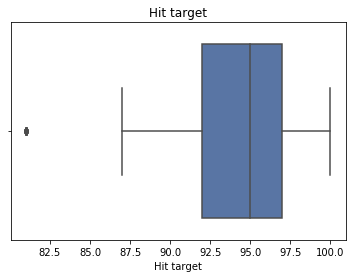

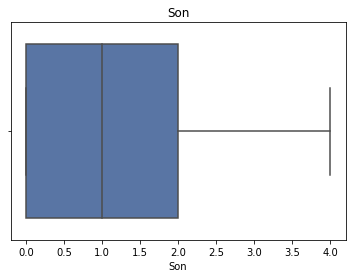

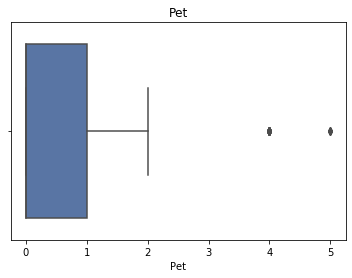

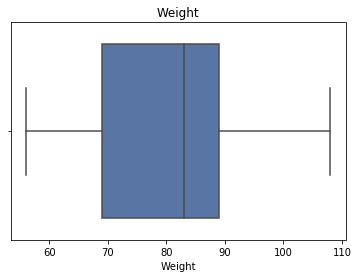

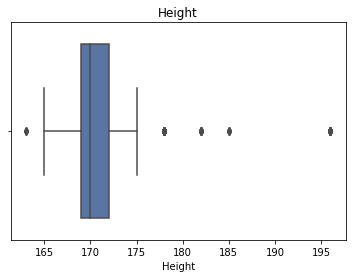

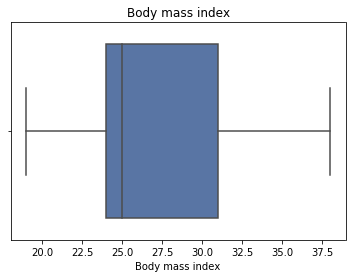

In [76]:
# Visualização dos outliers em diagramas de caixas apenas dos dados numéricos de modo a visualizar os outliers.
for i in numerical: 
    plt.figure() 
    plt.clf() 
    sns.boxplot(train[i],palette="deep") 
    plt.title(i) 
    plt.show()


In [77]:
for i in numerical:
    # Retiramos o quartil 25 e 75 da feature i
    q75, q25 = np.percentile(train[i], [75,25])
    # Calculamos o interquartil
    iqr = q75 - q25
    # Calculamos os extremos
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    # Substituimos os outliers por NA
    train.loc[train[i]< minimum,i] = np.nan
    train.loc[train[i]> maximum,i] = np.nan

In [78]:
# Apos substituir todos os outliers por NA, calculou-se o número de outliers pelo que deu 162.
train.isna().sum().sum()

162

In [82]:
# Testar depois com os outros imputes definidos
train = impute_median_mode(train)

In [83]:
# já preencheu os missing datas
train.isna().sum().sum()

32

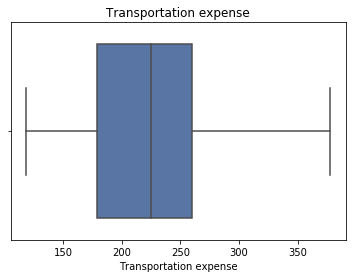

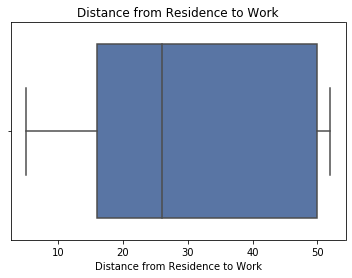

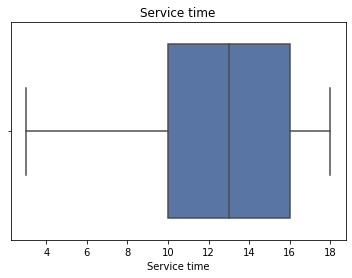

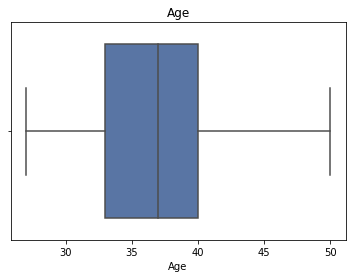

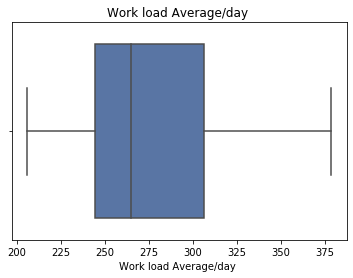

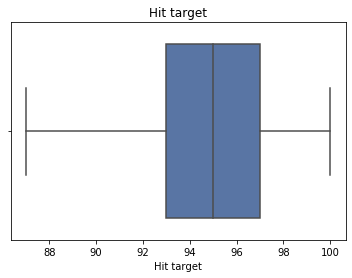

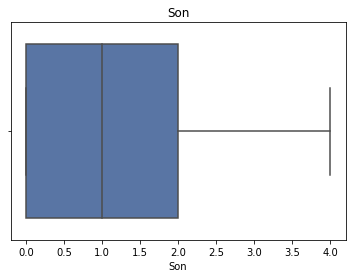

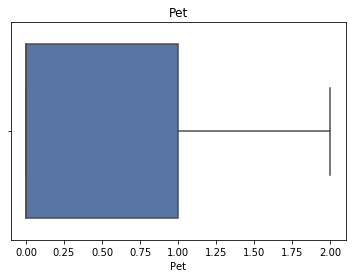

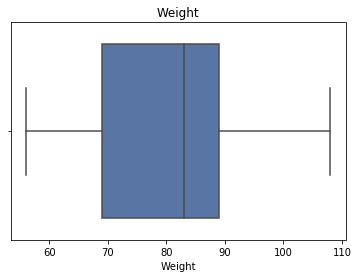

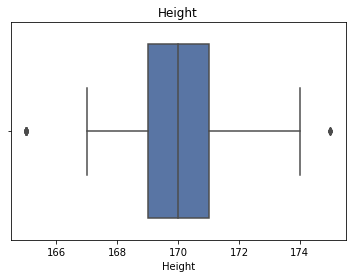

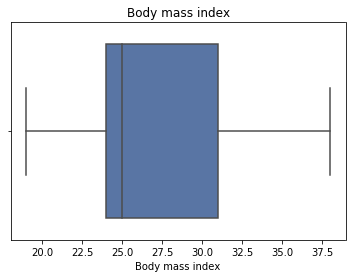

In [84]:
# Visualizar e perceber que desta maneira já não possui outliers
for i in numerical: 
    plt.figure() 
    plt.clf() 
    sns.boxplot(train[i],palette="deep") 
    plt.title(i) 
    plt.show()

# Feature selection

In [ ]:
#Dataframe com todas as features numéricas com o Absent
df_corr = train.loc[:,["Transportation expense","Distance from Residence to Work","Service time",
             "Age","Work load Average/day ","Hit target",
             "Son","Pet","Weight","Height","Body mass index"]]

In [ ]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [ ]:
# Removemos o BMI 
train = train.drop(["Body mass index"],axis=1)

In [ ]:
numerical.remove("Body mass index")

In [45]:
numerical

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Son',
 'Pet',
 'Weight',
 'Height']

In [46]:
# é preciso testar vários K's de modo a encontrar o melhor 
selector = SelectKBest(f_classif,k=5)
selector.fit(train,target)
cols = selector.get_support(indices=True)
cols_names = list(train.columns[cols])

In [47]:
cols_names

['Reason for absence', 'Seasons', 'Age', 'Hit target', 'Disciplinary failure']

In [48]:
train = train[cols_names]

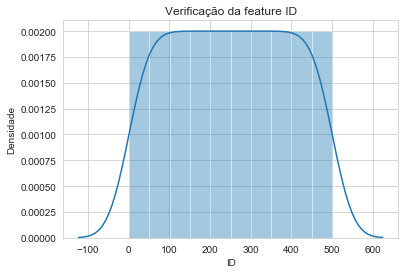

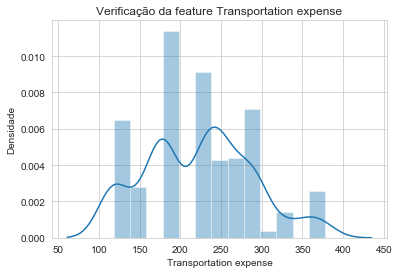

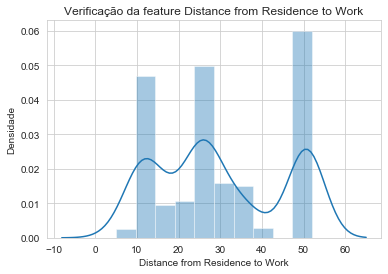

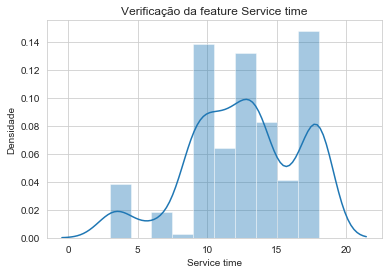

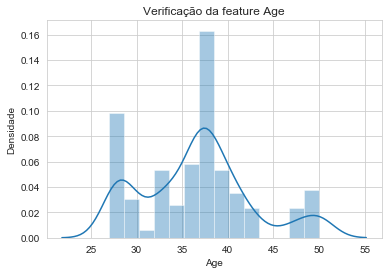

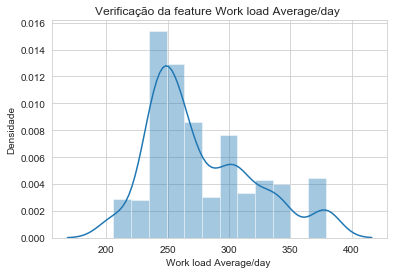

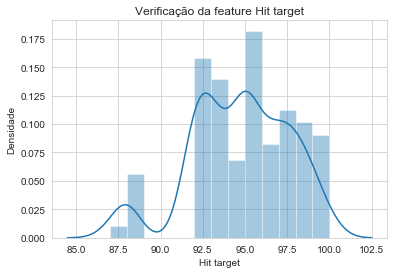

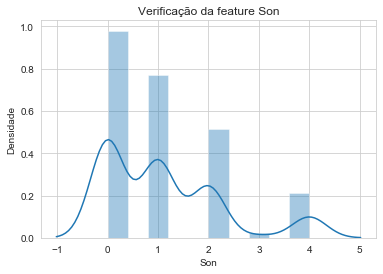

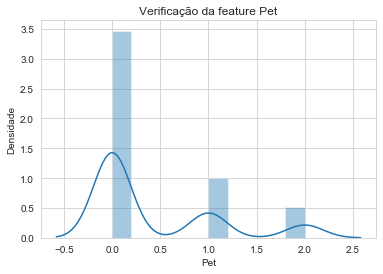

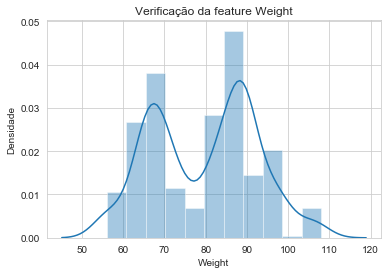

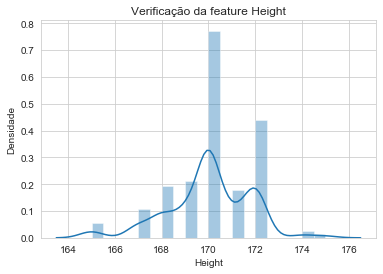

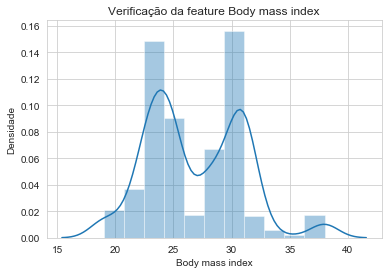

In [42]:
# Visualização das normalizações
for i in numerical:
    sns.distplot(train[i],bins = 'auto')
    plt.title("Verificação da feature "+str(i))
    plt.ylabel("Densidade")
    plt.show()

In [197]:
# Normalização das variáveis numéricas
for i in numerical:
    train[i] = (train[i] - train[i].min())/(train[i].max()-train[i].min())

In [193]:
numerical

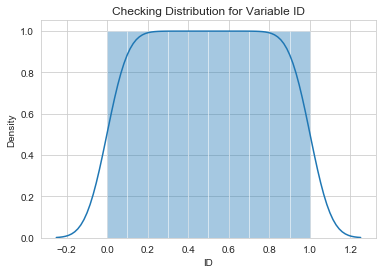

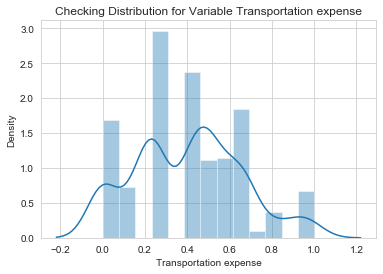

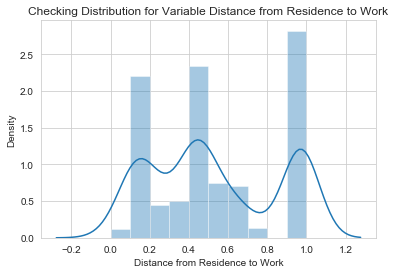

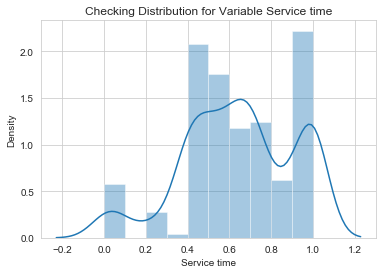

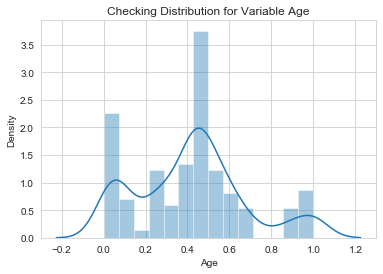

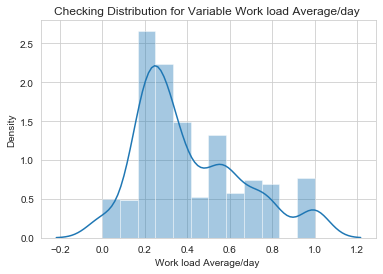

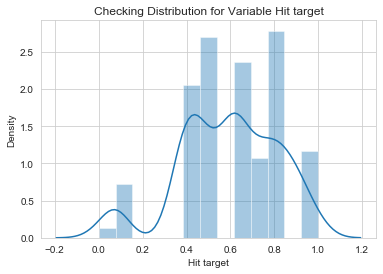

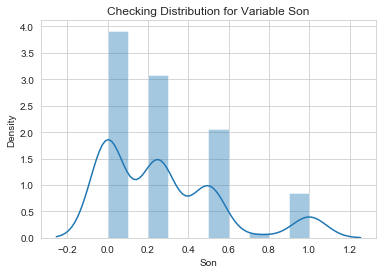

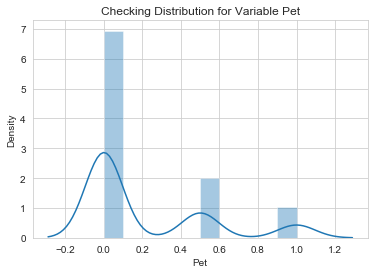

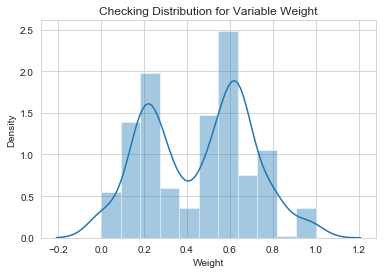

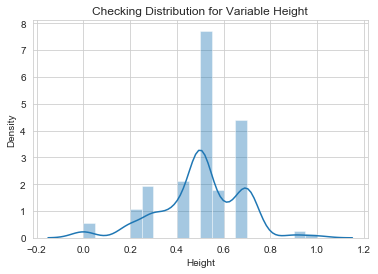

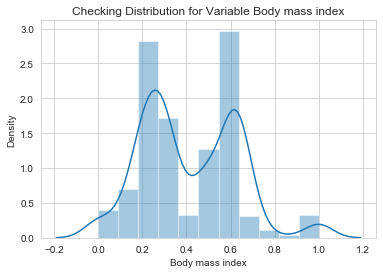

In [44]:
# Após a normalização dos dados
for i in numerical:
    sns.distplot(train[i],bins = 'auto')
    plt.title("Verificação da feature "+str(i))
    plt.ylabel("Densidade")
    plt.show()

In [222]:
# Standartização dos dados 
for i in numerical: 
    train[i] = preprocessing.scale(np.array(train[i]))

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Reason for absence                 500 non-null category
Month of absence                   500 non-null category
Day of the week                    500 non-null category
Seasons                            500 non-null category
Transportation expense             500 non-null float64
Distance from Residence to Work    500 non-null float64
Service time                       500 non-null float64
Age                                500 non-null float64
Work load Average/day              500 non-null float64
Hit target                         500 non-null float64
Disciplinary failure               500 non-null category
Education                          500 non-null category
Son                                500 non-null float64
Social drinker                     500 non-null category
Social smoker                      500 non-null category
Pet                                500 non-null

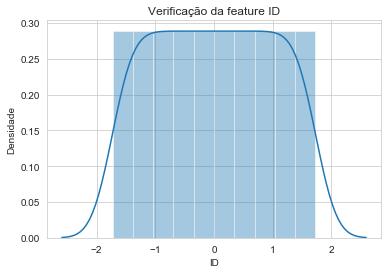

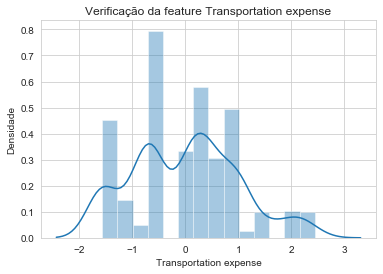

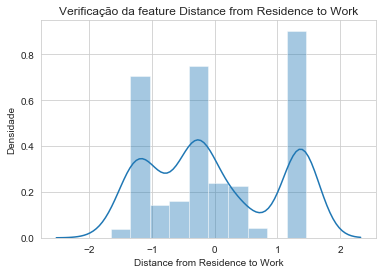

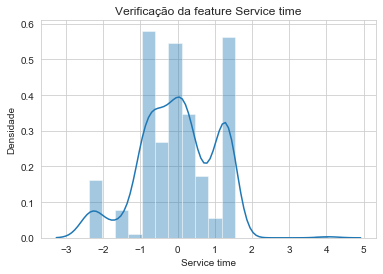

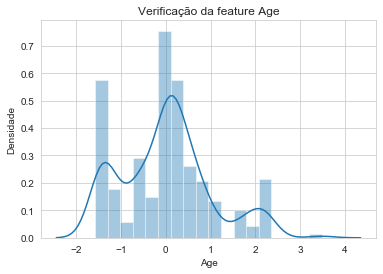

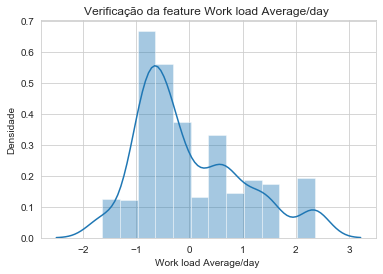

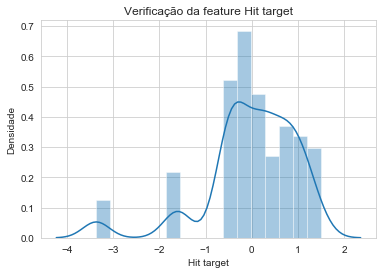

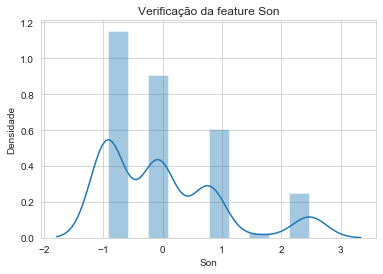

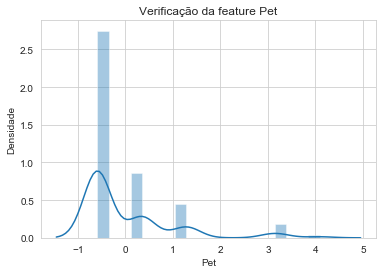

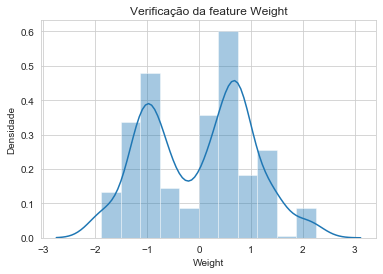

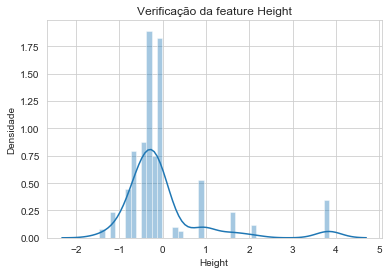

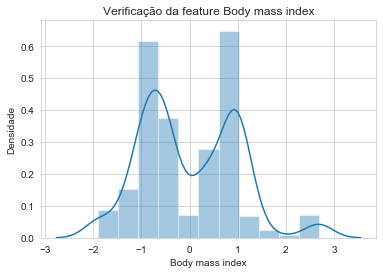

In [52]:
# Distribuição
for i in numerical:
    sns.distplot(train[i],bins = 'auto')
    plt.title("Verificação da feature "+str(i))
    plt.ylabel("Densidade")
    plt.show()

## MODELOS DE MACHINE LEARNING

In [223]:
# REGRESSÃO LINEAR 
X = train
Y = train["Absent"]

In [95]:
from sklearn.linear_model import LinearRegression

In [224]:
X = X.drop(["Absent"],axis=1)

In [225]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
lm = LinearRegression()

In [104]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
predictions = lm.predict(X_test)

In [106]:
from sklearn import metrics 
print('MAE:',metrics.mean_absolute_error(Y_test,predictions)) 
print('MSE:',metrics.mean_squared_error(Y_test,predictions)) 
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 0.21816745603188464
MSE: 0.0897216738166033
RMSE: 0.299535763835645


In [226]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

C:\Users\joaon\AppData\Local\conda\conda\envs\env.aec\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
predictions = logmodel.predict(X_test)

In [228]:
from sklearn.metrics import classification_report

In [229]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        26
           1       0.89      1.00      0.94       124

    accuracy                           0.90       150
   macro avg       0.95      0.71      0.77       150
weighted avg       0.91      0.90      0.88       150



In [230]:
teste = pd.read_csv("test_data.csv")

In [231]:
teste.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,501,23,9,6,1,179,26,9,30,261756,87,0,3,0,0,0,0,56,171,19
1,502,23,9,6,1,248,25,14,47,261756,87,0,1,2,0,0,1,86,165,32
2,503,23,9,2,1,179,51,18,38,261756,87,0,1,0,1,0,0,89,170,31
3,504,23,9,4,1,225,26,9,28,261756,87,0,1,1,0,0,2,69,169,24
4,505,23,9,2,1,179,26,9,30,261756,87,0,3,0,0,0,0,56,171,19


In [232]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 20 columns):
ID                                 240 non-null int64
Reason for absence                 240 non-null int64
Month of absence                   240 non-null int64
Day of the week                    240 non-null int64
Seasons                            240 non-null int64
Transportation expense             240 non-null int64
Distance from Residence to Work    240 non-null int64
Service time                       240 non-null int64
Age                                240 non-null int64
Work load Average/day              240 non-null int64
Hit target                         240 non-null int64
Disciplinary failure               240 non-null int64
Education                          240 non-null int64
Son                                240 non-null int64
Social drinker                     240 non-null int64
Social smoker                      240 non-null int64
Pet                            

In [237]:
teste.drop(["Body mass index"],axis=1)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
0,501,23,9,6,1,179,26,9,30,261756,87,0,3,0,0,0,0,56,171
1,502,23,9,6,1,248,25,14,47,261756,87,0,1,2,0,0,1,86,165
2,503,23,9,2,1,179,51,18,38,261756,87,0,1,0,1,0,0,89,170
3,504,23,9,4,1,225,26,9,28,261756,87,0,1,1,0,0,2,69,169
4,505,23,9,2,1,179,26,9,30,261756,87,0,3,0,0,0,0,56,171
5,506,23,9,3,4,369,17,12,31,261756,87,0,1,3,1,0,0,70,169
6,507,22,9,3,4,361,52,3,28,261756,87,0,1,1,1,0,4,80,172
7,508,4,10,5,4,289,48,29,49,284853,91,0,1,0,0,0,2,108,172
8,509,11,10,5,4,235,16,8,32,284853,91,0,3,0,0,0,0,75,178
9,510,26,10,6,4,246,25,16,41,284853,91,0,1,0,1,0,0,67,170


In [236]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 20 columns):
ID                                 240 non-null int64
Reason for absence                 240 non-null int64
Month of absence                   240 non-null int64
Day of the week                    240 non-null int64
Seasons                            240 non-null int64
Transportation expense             240 non-null int64
Distance from Residence to Work    240 non-null int64
Service time                       240 non-null int64
Age                                240 non-null int64
Work load Average/day              240 non-null int64
Hit target                         240 non-null int64
Disciplinary failure               240 non-null int64
Education                          240 non-null int64
Son                                240 non-null int64
Social drinker                     240 non-null int64
Social smoker                      240 non-null int64
Pet                            